In [1]:
import numpy as np
import os
import sys

sys.path.append(os.path.abspath("../../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.fourier import FourierBasis

sys.path.append(os.path.abspath("../../J"))
from J.jmatrix import JMatrix

### Settings

In [2]:
t_values = np.linspace(0, 1, 1000)

### B-splines Polynomial J

In [3]:
degree_bspline = 0
num_basis_bspline = 2
bspline_0_2 = BSplineBasis(degree_bspline, num_basis_bspline)

degrees_poly = [0, 1, 2, 3]
poly_4 = PolynomialBasis(degrees_poly)

In [4]:
j_matrix_calculator = JMatrix(bspline_0_2, poly_4)
J = j_matrix_calculator.compute()
print(J)

[[0.5        0.125      0.04166667 0.015625  ]
 [0.5        0.375      0.29166667 0.234375  ]]


### B-splines B-splines J

In [5]:
degree_bspline = 0
num_basis_bspline = 3
bspline_0_3 = BSplineBasis(degree_bspline, num_basis_bspline)

degree_bspline = 1
num_basis_bspline = 5
bspline_1_5 = BSplineBasis(degree_bspline, num_basis_bspline)

In [6]:
j_matrix_calculator = JMatrix(bspline_0_3, bspline_1_5)
J = j_matrix_calculator.compute()
print(J)

[[0.125      0.19444444 0.01388889 0.         0.        ]
 [0.         0.05555556 0.22222222 0.05555556 0.        ]
 [0.         0.         0.01388889 0.19444444 0.125     ]]


### Polynomial Fourier J

In [27]:
degrees_poly = [0, 1, 2]
poly_3 = PolynomialBasis(degrees_poly)

num_basis_fourier = 5
fourier_5 = FourierBasis(num_basis_fourier)

In [28]:
j_matrix_calculator = JMatrix(poly_3, fourier_5)
J = j_matrix_calculator.compute()
print(J)

[[ 1.00000000e+00 -7.27215328e-18  3.74635373e-17 -7.98460799e-17
   3.06969815e-17]
 [ 5.00000000e-01 -1.59154943e-01 -9.02380698e-18 -7.95774715e-02
   8.40959687e-18]
 [ 3.33333333e-01 -1.59154943e-01  5.06605918e-02 -7.95774715e-02
   1.26651480e-02]]


### Plot the whole basis

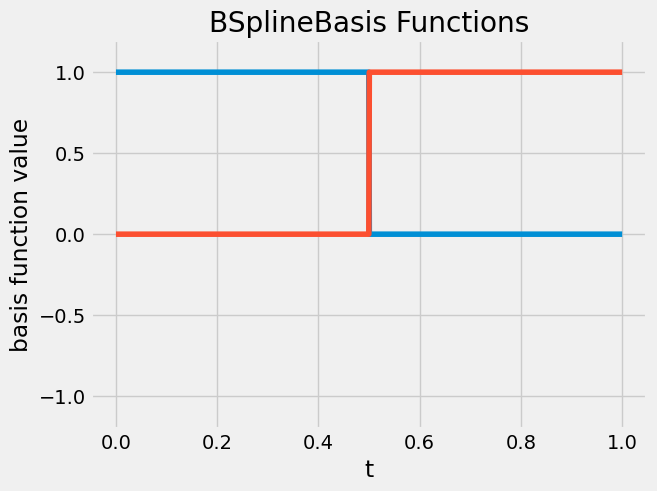

In [19]:
bspline_0_2.plot_basis_functions(t_values)

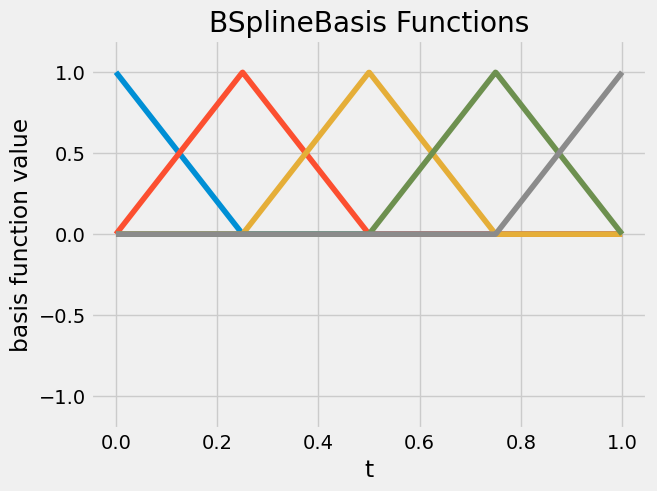

In [20]:
bspline_1_5.plot_basis_functions(t_values)

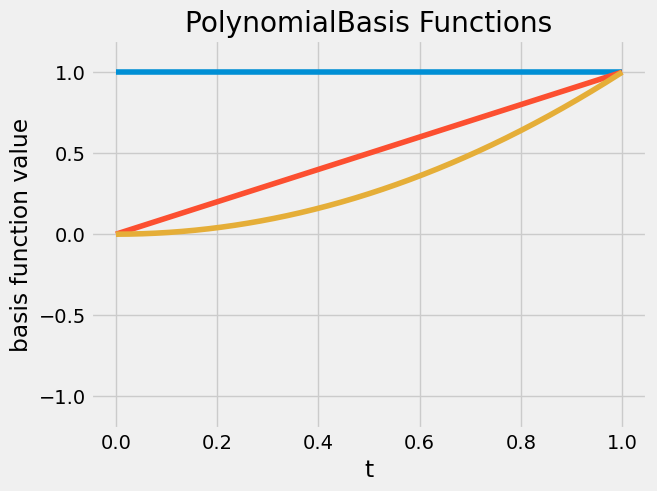

In [21]:
poly_3.plot_basis_functions(t_values)

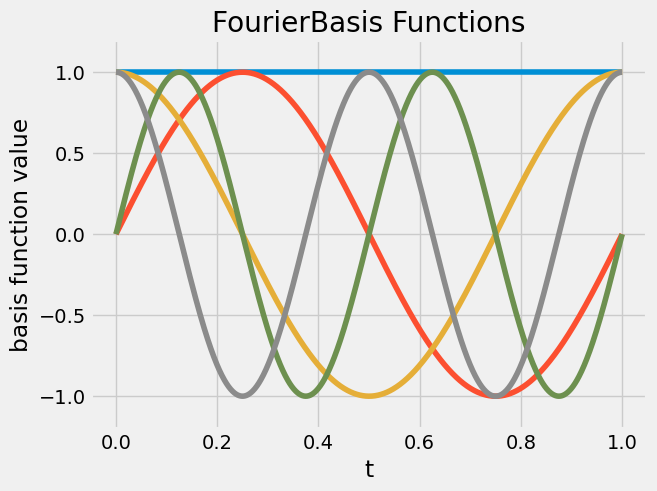

In [29]:
fourier_5.plot_basis_functions(t_values)

### Plot experimental run

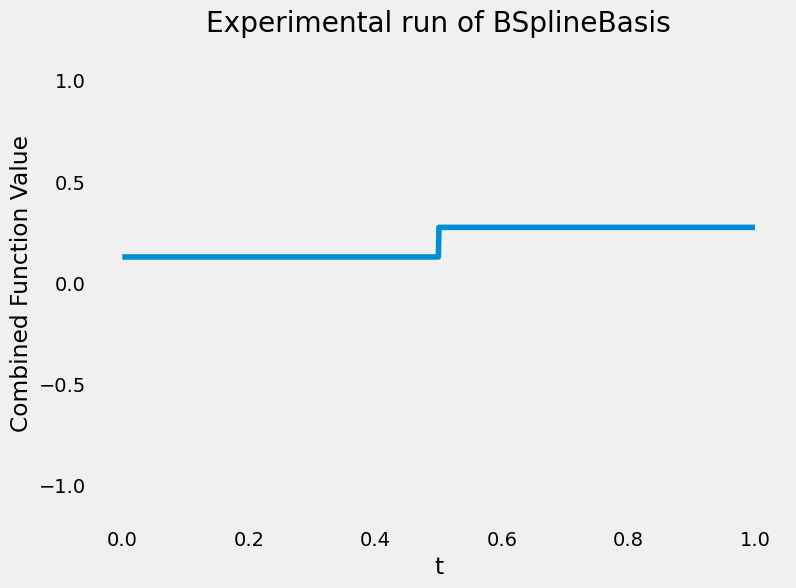

In [23]:
coefficients = np.random.uniform(-1, 1, bspline_0_2.num_basis_functions)
bspline_0_2.plot_experimental_run(t_values, coefficients)

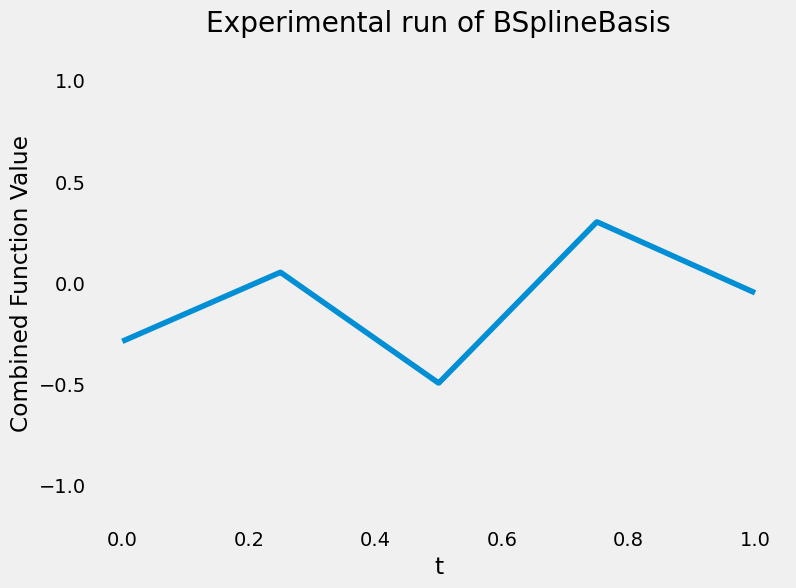

In [24]:
coefficients = np.random.uniform(-1, 1, bspline_1_5.num_basis_functions)
bspline_1_5.plot_experimental_run(t_values, coefficients)

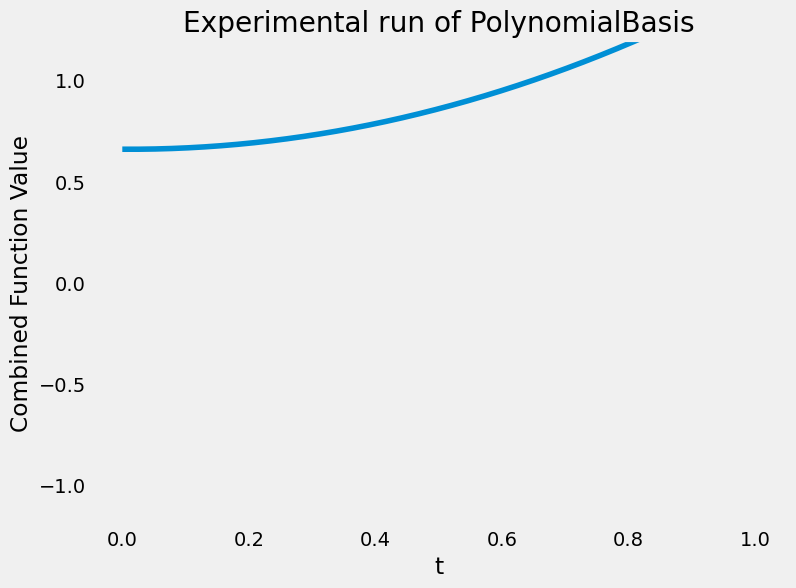

In [25]:
coefficients = np.random.uniform(-1, 1, poly_3.num_basis_functions)
poly_3.plot_experimental_run(t_values, coefficients)

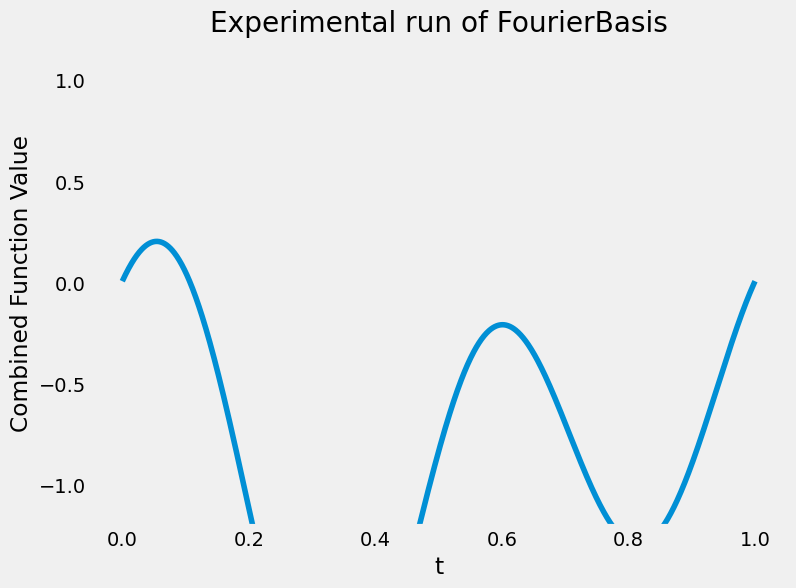

In [31]:
coefficients = np.random.uniform(-1, 1, fourier_5.num_basis_functions)
fourier_5.plot_experimental_run(t_values, coefficients)